In [13]:
from mlxtend.plotting import plot_confusion_matrix
import tensorflow as tf
import h5py
from tensorflow import keras

In [5]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
carpetas = ['fits_inclinated','zvar',"z_cero"]
path = '/project/Data/SAD_CNN/'

In [8]:
i = 0

In [11]:
with h5py.File(path + carpetas[i]  +"/"+carpetas[i]+"_dataset.h5", 'r') as hdf:
    x_test = hdf['x_test'][:]
    test_labels = hdf['test_labels'][:]

In [15]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(300, 300, 3),
    include_top=False)
base_model.trainable = False
inputs = keras.Input(shape=(300, 300, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1,activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [16]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [17]:
model.load_weights(f'labels/{carpetas[i]}/checkpoints/my_checkpoint')


In [ ]:
test_predicted = model.predict(x_test)

2024-05-21 10:23:03.394141: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906


12/15 [=======================>......] - ETA: 0s

In [18]:
test = pd.DataFrame(test_predicted,columns=["sigmoid"])
test["label"] = test_labels

In [19]:
test.loc[test["sigmoid"] > 0.5,"label_predict"] = 1
test.loc[test["sigmoid"] <= 0.5,"label_predict"] = 0

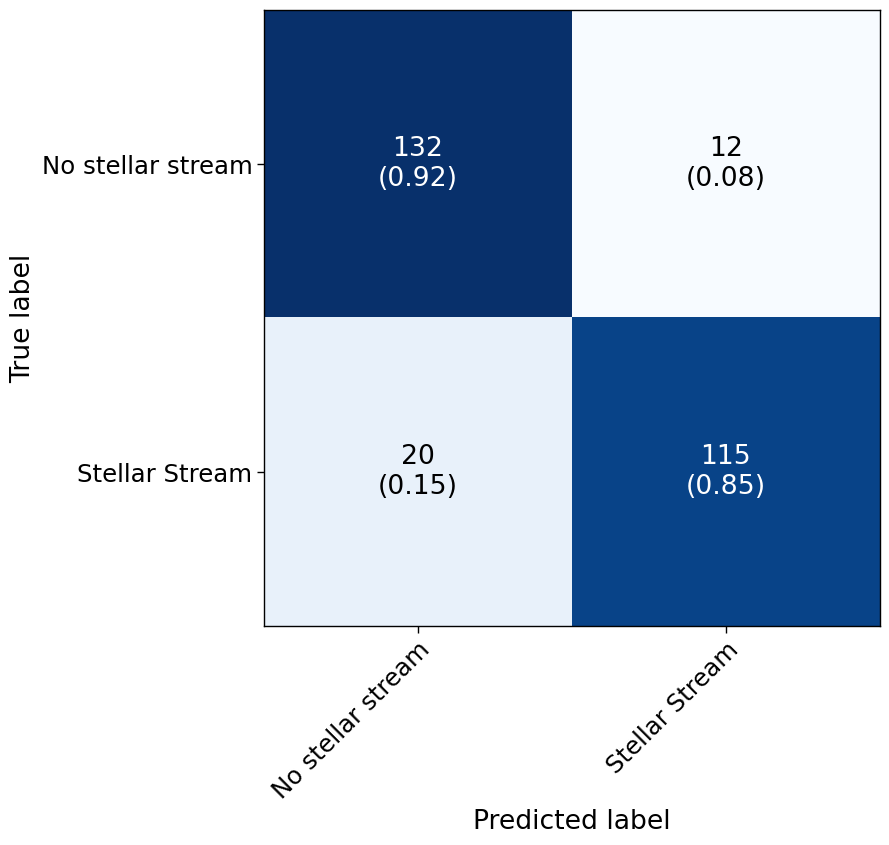

In [20]:
array = np.array(tf.math.confusion_matrix(test["label"],test["label_predict"]) )
plt.rcParams["figure.figsize"] = (8,8)
sns.set_context("paper",font_scale=2)
fig = plot_confusion_matrix(array,class_names=["No stellar stream","Stellar Stream"],show_normed=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig(f'labels/{carpetas[i]}/CM_binary.pdf', bbox_inches = 'tight')

In [23]:
test[test["label_predict"] != test["label"]]

,sigmoid,label,label_predict
0,0.404076,1,0.0
6,0.405865,1,0.0
22,0.236867,1,0.0
24,0.329363,1,0.0
26,0.484716,1,0.0
44,0.431939,1,0.0
46,0.459435,1,0.0
51,0.303407,1,0.0
53,0.361616,1,0.0
72,0.475910,1,0.0


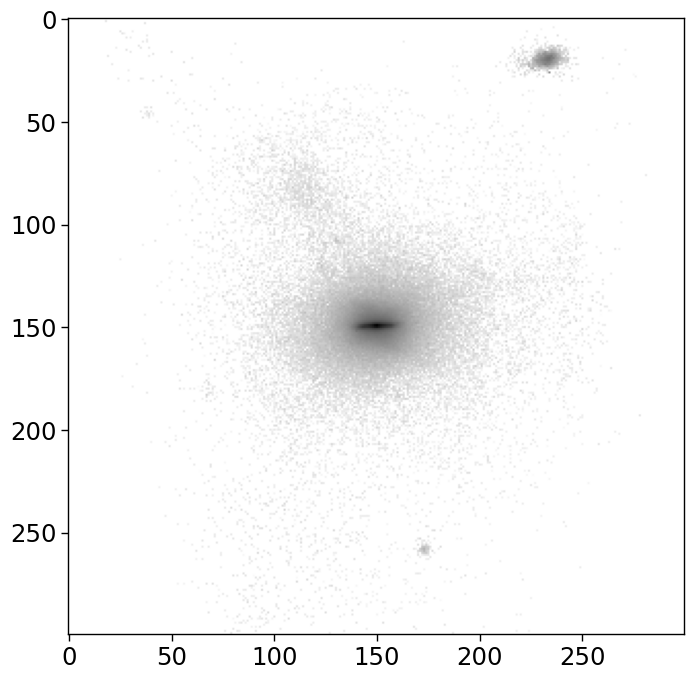

In [22]:
plt.imshow(x_test[0])